In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque, namedtuple

## Where is my Cheese ?

### Problem Statment 
A mice in search of cheese !

A 6 * 6 grid with walls and traps, a mice (agent) has to find its way to 
the cheese (goal state). The agent will try and learn using Q-Learning algorithm to reach the final state. 

(i) From a given point there are 4 possible actions 'up', 'down', 'left', 'right'. 

(ii) The agent cannot pass through the wall, i.e there is no action

(iii) The agnet can step on a trap, but will gain a negative reward.





### Initialization and Setting the environment

Possible actions => -1

Possible traps => -50

No possible actions => nan

Goal state => 100

In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
'''
rows = 6
cols = 6
action = ['up', 'down', 'right', 'left']
S = ['A','B','C','D','E','F']
A = ['A','B','C','D','E','F']

R = np.ones((rows,cols)) * -1

walls = [(2,2), (2,3), 
         (3,2)]
traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
cheese = (4,5)

for i in traps:
    R[i] = -50
for i in walls:
    R[i] = np.nan
R[cheese] = 100

Q = np.zeros((rows,cols,4))

R

array([[-50.,  -1., -50.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1., -50.],
       [ -1.,  -1.,  nan,  nan,  -1.,  -1.],
       [ -1.,  -1.,  nan,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1., 100.],
       [-50.,  -1.,  -1., -50.,  -1.,  -1.]])

**Training the AI Agent using Q-Learning**

Random action is selected when selecting from the next possible actions, but a wall state cannot be chosen. get_available_actions() picks only all possible movable states. 
No policy is inclued so the agent will always choose a random action at any given state from the list of possible actions.

Discount factor of 0.9 (gamma) for the future rewards and learning rate of 0.9 (alpha) rate at which the agent should learn is initiated

In [ ]:
gamma = 0.9    #discount_factor     #discount factor for future rewards
alpha  = 0.9   #learning_rate.      #the rate at which the AI agent should learn

In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 


def immediate_rewards(c_row,c_col, action_index):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old +reward
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    return(q_updated)


def get_available_actions(c_row,c_col): 
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
            
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    # actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)
    

def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col




In [ ]:
def get_next_random_action(available_actions): 
    '''
    Randomely chooses an action from the list of available actions
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    next_action= np.random.choice(available_actions)
    return next_action

Q-Learning with random search of actions. The iterates for 200 episodes and each episode is run until the goal state is reached. A average reward is calculated for each episode and appened to a list.

discount_factor = 0.9    #discount factor for future rewards

learning_rate = 0.9      #the rate at which the AI agent learns

In [ ]:
'''
Q-Learning with random search for actions
'''
def AgentTrain():
  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]
  # temp=[]

  # Running 200 episodes for the agent to train
  for ep in range(200):
    episodeList.append(ep)
    # r = []
    c_row, c_col,action_index = get_random_location()
    Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index)
    scores_window = deque(maxlen=50)
    step =0

    #for each episode untill the goal state is reached the iteration runs. 
    #The Q values are updated but the actions are selected at random in every iteration
    while R[c_row, c_col] != R[cheese]:
      step +=1
      rewardList = []

      #to get a list of all available actions from a given state
      available_actions = get_available_actions(c_row, c_col)

      #Selects a random action from the list of all available actions
      next_action = get_next_random_action(available_actions)
      
      #from the selected next action of the current statate -> the new state is identified
      old_row = c_row
      old_col = c_col
      c_row , c_col = next_location(c_row, c_col, next_action)

      #getting the reward of the new state
      reward = R[c_row,c_col]
      
      #updating q table with the new reward
      q_old = Q[old_row,old_col,next_action]
      q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

      # r.append(reward)

      rewardList.append(q_updated)
      scores_window.append(q_updated)
      # print('Immediate reward is {}'.format(q_updated))
      Q[old_row, old_col, next_action] = q_updated

    # temp.append(r)
    stepList.append(step)
    avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
    if ep % 50 ==0:
      print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

  return episodeList ,stepList ,avg_reward_per_episode


episodeList, stepList, avg_reward_per_episode = AgentTrain()


Episode 0	Average Score: -4.40
Episode 50	Average Score: 72.49
Episode 100	Average Score: 57.45
Episode 150	Average Score: 44.06


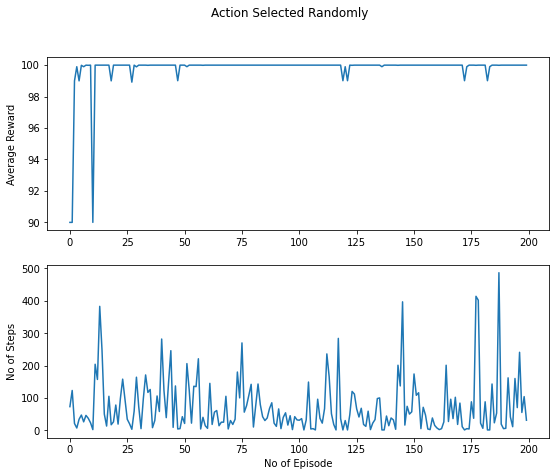

In [ ]:
plt.figure(figsize=(9,7))
plt.suptitle("Action Selected Randomly")
plt.subplot(2, 1, 1)
plt.plot(episodeList, avg_reward_per_episode)
plt.ylabel('Average Reward')

plt.subplot(2, 1, 2)
plt.plot(episodeList, stepList)
plt.xlabel('No of Episode')
plt.ylabel('No of Steps')
plt.show()

## Epsilon With a threshold

For a single set of Alpha, gamma, learning rate values

Q values are updated with the following formula : 

q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

A threshold is set for epsilon,
when the selected factor is less than epsilon (0.6) a random action is selected, if the selected factor is greater, the best action is selected (Q max from Q matrix)


In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
'''
rows = 6
cols = 6
action = ['up', 'down', 'right', 'left']
R = np.ones((rows,cols)) * -1

walls = [(2,2), (2,3), 
         (3,2)]
traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
cheese = (4,5)

for i in traps:
    R[i] = -50
for i in walls:
    R[i] = np.nan
R[cheese] = 100

Q = np.zeros((rows,cols,4))


epsilon = 0.8  #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9    #discount_factor     #discount factor for future rewards
alpha  = 0.9   #learning_rate.      #the rate at which the AI agent should learn

In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 



def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col



def get_available_actions(c_row,c_col): # 0 6
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
           
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    # actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)



def immediate_rewards(c_row,c_col, action_index):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

    return(q_updated)  

The next action is chosen with a factor generated randomly, if the generated factor is greater than epsilon, the best action is selected (Q max from Q matrix) else a random action is selected.

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action
    if np.random.random() > epsilon:
      temp = {}
      for i in available_actions:
          temp[i] = Q[c_row, c_col, i]
      next_action = max(temp, key=temp.get)
      
    #choose a random action
    else: 
        next_action= np.random.choice(available_actions)
    # print('Choosen action {}'.format(action[next_action]))
    return next_action


In [ ]:
'''
Q-Learning with a threshold in choosing next actions
'''
def AgentTrainwithThreshold():
  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]

  # Running 200 episodes for the agent to train
  for ep in range(200):
    episodeList.append(ep)
    c_row, c_col,action_index = get_random_location()
    Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index)
    scores_window = deque(maxlen=50)
    step =0

    #for each episode untill the goal state is reached the iteration runs. 
    #The Q values are updated but the actions are selected at random in every iteration
    while R[c_row, c_col] != R[cheese]:
      step +=1
      rewardList = []

      #to get a list of all available actions from a given state
      available_actions = get_available_actions(c_row, c_col)

      #next action with epsilon and threshold
      next_action = get_next_action(available_actions, c_row, c_col, epsilon)
      
      #from the selected next action of the current statate -> the new state is identified
      old_row = c_row
      old_col = c_col
      c_row , c_col = next_location(c_row, c_col, next_action)

      #getting the reward of the new state
      reward = R[c_row,c_col]
      
      #updating q table with the new reward
      q_old = Q[old_row,old_col,next_action]
      q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

      rewardList.append(q_updated)
      scores_window.append(q_updated)
      # print('Immediate reward is {}'.format(q_updated))
      Q[old_row, old_col, next_action] = q_updated

    stepList.append(step)
    avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
    if ep % 50 ==0:
      print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

    
  return episodeList ,stepList ,avg_reward_per_episode


episodeList, stepList, avg_reward_per_episode = AgentTrainwithThreshold()

Episode 0	Average Score: -5.14
Episode 50	Average Score: 48.51
Episode 100	Average Score: 56.05
Episode 150	Average Score: 66.88


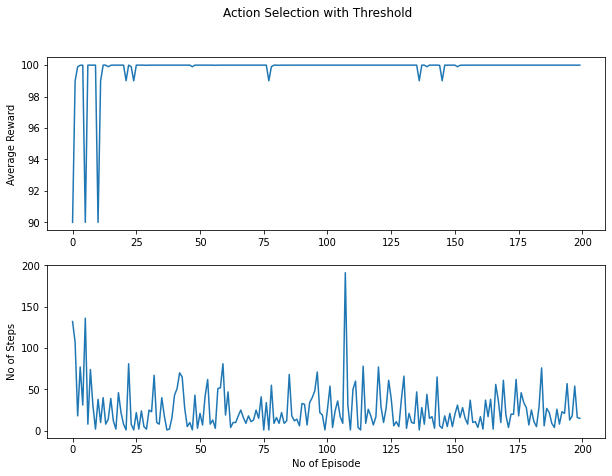

In [ ]:
plt.figure(figsize=(10,7))
plt.suptitle("Action Selection with Threshold")
plt.subplot(2, 1, 1)
plt.plot(episodeList, avg_reward_per_episode)
plt.ylabel('Average Reward')

plt.subplot(2, 1, 2)
plt.plot(episodeList, stepList)
plt.xlabel('No of Episode')
plt.ylabel('No of Steps')
plt.show()

## Epsilon Greedy Policy 

*The agent is at first prompted to explore the environment and then as the number of iterations increases prompted to exploit the environment.* 

For a single set of Alpha, gamma, learning rate values

Q values are updated with the following formula : 

q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
'''
rows = 6
cols = 6
action = ['up', 'down', 'right', 'left']
R = np.ones((rows,cols)) * -1

walls = [(2,2), (2,3), 
         (3,2)]
traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
cheese = (4,5)

for i in traps:
    R[i] = -50
for i in walls:
    R[i] = np.nan
R[cheese] = 100

Q = np.zeros((rows,cols,4))


epsilon = 0.8  #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9    #discount_factor     #discount factor for future rewards
alpha  = 0.9   #learning_rate.      #the rate at which the AI agent should learn

decay = 0.999
min_epsilon = 0.1

In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 



def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col



def get_available_actions(c_row,c_col): # 0 6
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
           
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)



def immediate_rewards(c_row,c_col, action_index):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

    return(q_updated)  

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action
    if np.random.random() > epsilon:
      temp = {}
      for i in available_actions:
          temp[i] = Q[c_row, c_col, i]
      next_action = max(temp, key=temp.get)
      
    else: #choose a random action
        next_action= np.random.choice(available_actions)
    return next_action


def update_epsilon(epsilon,decay, min_epsilon):
  '''
  if epsilon is > 0.5, multiplying epsilon with 0.999 else multipling epsilon with 0.995
  Parameters : 
    epsilon
  Returns : 
    updated epsilon
  '''
  epsilon = max(min_epsilon, epsilon*decay)
  return epsilon

In [ ]:
'''
Q-Learning with a threshold in choosing next actions
'''

def AgentTrainwithThreshold(epsilon = 0.8, gamma = 0.9, alpha  = 0.9, decay = 0.999, min_epsilon = 0.1 ):
  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]

  # Running 200 episodes for the agent to train
  for ep in range(200):
    episodeList.append(ep)
    r = []
    c_row, c_col,action_index = get_random_location()
    Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index)
    scores_window = deque(maxlen=50)
    step =0

    #for each episode untill the goal state is reached the iteration runs. 
    #The Q values are updated but the actions are selected at random in every iteratio
    while R[c_row, c_col] != R[cheese]:
      step +=1
      rewardList = []
        
      #to get a list of all available actions from a given state
      available_actions = get_available_actions(c_row, c_col)

      #update epsilon for every iteration as the agents should explore first and exploit in the end
      # epsilon = max(min_epsilon, epsilon*decay)
      epsilon = update_epsilon(epsilon, decay, min_epsilon)

      #next action
      next_action = get_next_action(available_actions, c_row, c_col, epsilon)
      

      old_row = c_row
      old_col = c_col

      c_row , c_col = next_location(c_row, c_col, next_action)

      #getting the reward of the new state
      reward = R[c_row,c_col]
      #updating q table with the new reward     
      q_old = Q[old_row,old_col,next_action]
      q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
      
      rewardList.append(q_updated)
      scores_window.append(q_updated)
      # print('Immediate reward is {}'.format(q_updated))
      Q[old_row, old_col, next_action] = q_updated

    stepList.append(step)
    avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
    if ep % 50 ==0:
      print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

  return episodeList ,stepList ,avg_reward_per_episode


episodeList, stepList, avg_reward_per_episode = AgentTrainwithThreshold(epsilon = 0.8)


Episode 0	Average Score: 3.78
Episode 50	Average Score: 75.79
Episode 100	Average Score: 99.01
Episode 150	Average Score: 54.25


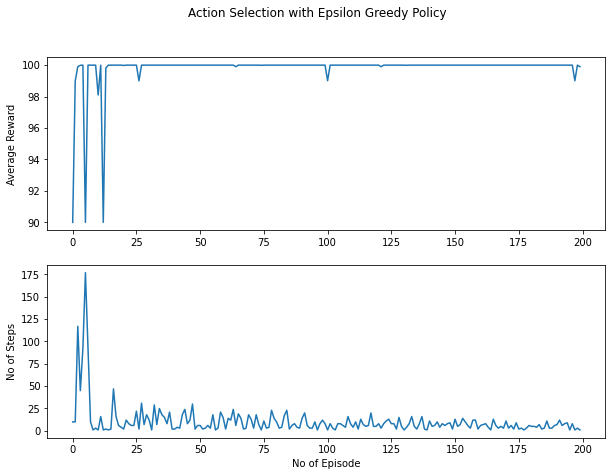

In [ ]:
plt.figure(figsize=(10,7))
plt.suptitle("Action Selection with Epsilon Greedy Policy")
plt.subplot(2, 1, 1)
plt.plot(episodeList, avg_reward_per_episode)
plt.ylabel('Average Reward')

plt.subplot(2, 1, 2)
plt.plot(episodeList, stepList)
plt.xlabel('No of Episode')
plt.ylabel('No of Steps')
plt.show()

## Alpha - Hyperparameter 

Alpha is the learning rate. Training the agent with various lerning rates to identify the best parameter. Gamma is given a constant value of 0.9

In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
with various alpha-gamma combination --> to find out which is the best set of parameters
'''
gamma = 0.9   
alphaList  = [0.3, 0.6, 0.9]

def env_reset():
  rows = 6
  cols = 6
  action = ['up', 'down', 'right', 'left']
  R = np.ones((rows,cols)) * -1

  walls = [(2,2), (2,3), 
          (3,2)]
  traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
  cheese = (4,5)

  for i in traps:
      R[i] = -50
  for i in walls:
      R[i] = np.nan
  R[cheese] = 500

  Q = np.zeros((rows,cols,4))
  epsilon = 0.8  #the percentage of time when we should take the best action (instead of a random action)

  return R, Q, action, epsilon


   #learning_rate.      #the rate at which the AI agent should learn

In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 



def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col



def get_available_actions(c_row,c_col): # 0 6
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
           
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)



def immediate_rewards(c_row,c_col, action_index,alpha):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

    return(q_updated)  

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action
    if np.random.random() > epsilon:
      temp = {}
      for i in available_actions:
          temp[i] = Q[c_row, c_col, i]
      next_action = max(temp, key=temp.get)
    
    #choose a random action
    else: 
        next_action= np.random.choice(available_actions)
    return next_action


def update_epsilon(epsilon,decay, min_epsilon):
  '''
  returns max epsilon
  Parameters : 
    epsilon
  Returns : 
    updated epsilon
  '''
  epsilon = max(min_epsilon, epsilon*decay)
  return epsilon

In [ ]:
 '''
Q-Learning with a threshold in choosing next actions
'''

def AgentTrainwithThreshold(epsilon = 0.8, gamma = 0.9, alphaList  = 0.9, decay = 0.999, min_epsilon = 0.1 ):

  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]
  alList = []
  stList = []
  for alpha in alphaList:

    R, Q, action, epsilon = env_reset()
    print(epsilon)
    episodeList = []
    avg_reward_per_episode=[]
    stepList=[]

    # Running 200 episodes for the agent to train
    for ep in range(300):
      episodeList.append(ep)
      r = []
      c_row, c_col,action_index = get_random_location()
      Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index,alpha)
      scores_window = deque(maxlen=50)
      step =0

      #for each episode untill the goal state is reached the iteration runs. 
      #The Q values are updated but the actions are selected at random in every iteratio
      while R[c_row, c_col] != R[cheese]:
        step +=1

        rewardList = []

        #to get a list of all available actions from a given state
        available_actions = get_available_actions(c_row, c_col)

        #update epsilon for every iteration as the agents should explore first and exploit in the end
        epsilon = update_epsilon(epsilon,decay, min_epsilon)

        #next action
        next_action = get_next_action(available_actions, c_row, c_col, epsilon)
        

        old_row = c_row
        old_col = c_col

        c_row , c_col = next_location(c_row, c_col, next_action)
        #getting the reward of the new state
        reward = R[c_row,c_col]
        #updating q table with the new reward  
        q_old = Q[old_row,old_col,next_action]
        q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

        r.append(reward)

        rewardList.append(q_updated)
        scores_window.append(q_updated)
        # print('Immediate reward is {}'.format(q_updated))
        Q[old_row, old_col, next_action] = q_updated

      stepList.append(step)
      avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
      # if ep % 50 ==0:
      #   print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))
      
    alList.append(avg_reward_per_episode)
    stList.append(stepList)

  return episodeList, stList, alList

gamma = 0.9 # [0.3, 0.6, 0.9]    
alphaList  = [0.3, 0.6, 0.9]    
episodeList, stList, alList = AgentTrainwithThreshold(epsilon = 0.8, alphaList=alphaList, gamma=gamma)


0.8
0.8
0.8


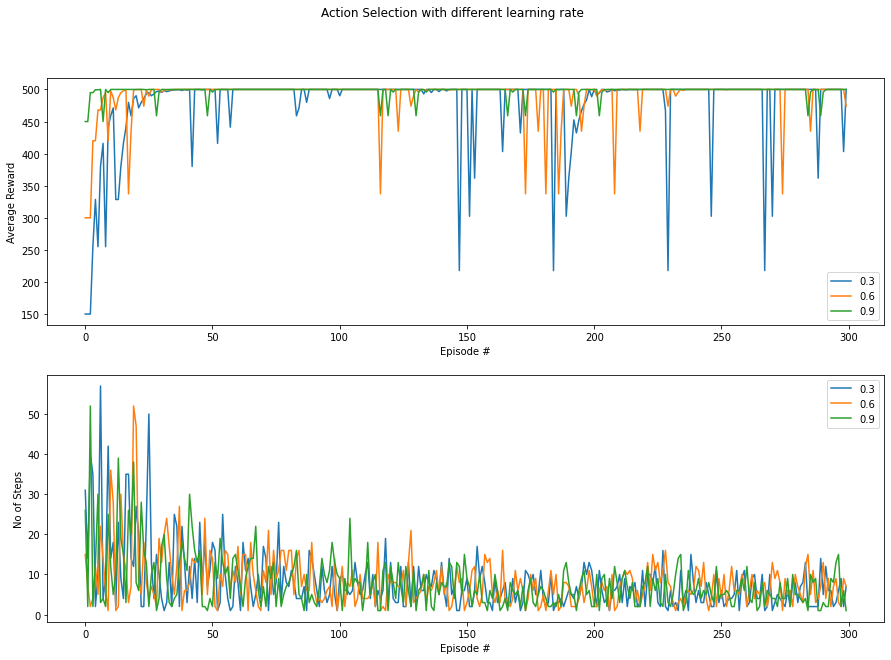

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Action Selection with different learning rate")
plt.subplot(2, 1, 1)
plt.plot(episodeList, alList[0] , label='alpha 0.3')
plt.plot(episodeList, alList[1] ,  label='alpha 0.6')
plt.plot(episodeList, alList[2] ,  label='alpha 0.9')
plt.legend(alphaList)
plt.xlabel('Episode #')
plt.ylabel('Average Reward')



plt.subplot(2, 1, 2)
plt.plot(episodeList, stList[0] , label='alpha 0.3')
plt.plot(episodeList, stList[1] , label='alpha 0.6')#, alpha = 0.5
plt.plot(episodeList, stList[2] ,   label='alpha 0.9')#, alpha=0.5
plt.legend(alphaList)
plt.xlabel('Episode #')
plt.ylabel('No of Steps')

plt.show()

## Hyperparameter tuning Alpha and Gamma

Alpha -> learning rate

Gamma - > discount factor

Training the agent with various alpha - gamma combination to identify the best combinations.

Policy - Epsilon greedy policy

In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
with various alpha-gamma combination --> to find out which is the best set of parameters
'''
gammaList = [0.3, 0.6, 0.9]    #discount_factor     #discount factor for future rewards
alphaList  = [0.3, 0.6, 0.9]

def env_reset():
  rows = 6
  cols = 6
  action = ['up', 'down', 'right', 'left']
  R = np.ones((rows,cols)) * -1

  walls = [(2,2), (2,3), 
          (3,2)]
  traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
  cheese = (4,5)

  for i in traps:
      R[i] = -50
  for i in walls:
      R[i] = np.nan
  R[cheese] = 500

  Q = np.zeros((rows,cols,4))
  epsilon = 0.8  #the percentage of time when we should take the best action (instead of a random action)

  return R, Q, action, epsilon


In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 



def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col



def get_available_actions(c_row,c_col): # 0 6
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
           
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)



def immediate_rewards(c_row,c_col, action_index,alpha,gamma):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

    return(q_updated)  

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action
    if np.random.random() > epsilon:
      temp = {}
      for i in available_actions:
          temp[i] = Q[c_row, c_col, i]
      next_action = max(temp, key=temp.get)
    
    #choose a random action
    else: 
        next_action= np.random.choice(available_actions)
    return next_action


def update_epsilon(epsilon,decay, min_epsilon):
  '''
  returns max epsilon
  Parameters : 
    epsilon
  Returns : 
    updated epsilon
  '''
  epsilon = max(min_epsilon, epsilon*decay)
  return epsilon

In [ ]:
'''
Q-Learning with a threshold in choosing next actions
'''

def AgentTrainwithThreshold(epsilon = 0.8, gammaList = 0.9, alphaList  = 0.9, decay = 0.999, min_epsilon = 0.1 ):


  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]
  agList = {}
  sgList = {}
  for alpha in alphaList:
    for gamma in gammaList:
      R, Q, action, epsilon = env_reset()

      episodeList = []
      avg_reward_per_episode=[]
      stepList=[]
      # Running 200 episodes for the agent to train
      for ep in range(200):
        episodeList.append(ep)
        r = []
        c_row, c_col,action_index = get_random_location()
        Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index,alpha,gamma)
        scores_window = deque(maxlen=50)
        step =0

      #for each episode untill the goal state is reached the iteration runs. 
      #The Q values are updated but the actions are selected at random in every iteratio
        while R[c_row, c_col] != R[cheese]:
          step +=1
          rewardList = []
          #to get a list of all available actions from a given state
          available_actions = get_available_actions(c_row, c_col)

          #update epsilon for every iteration as the agents should explore first and exploit in the end
          epsilon = update_epsilon(epsilon,decay, min_epsilon)

          #next action
          next_action = get_next_action(available_actions, c_row, c_col, epsilon)
          old_row = c_row
          old_col = c_col
          c_row , c_col = next_location(c_row, c_col, next_action)

          #getting the reward of the new state
          reward = R[c_row,c_col]
          q_old = Q[old_row,old_col,next_action]

          #updating q table with the new reward 
          q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
          r.append(reward)
          rewardList.append(q_updated)
          scores_window.append(q_updated)
          # print('Immediate reward is {}'.format(q_updated))
          Q[old_row, old_col, next_action] = q_updated

        stepList.append(step)
        avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
      key =  'alpha ' + str(alpha) + ' gamma '+str(gamma)
      agList.update({key : avg_reward_per_episode })
      sgList.update({key : stepList})
  return episodeList, sgList, agList
        
      # agList.append(avg_reward_per_episode)
      # stList.append(stepList)
gammaList = [0.3, 0.6, 0.9]    
alphaList  = [0.3, 0.6, 0.9]    
episodeList, sgList, agList = AgentTrainwithThreshold(epsilon = 0.8, alphaList=alphaList, gammaList=gammaList)


Text(0.5, 1.0, 'Different alpha - learning rates')

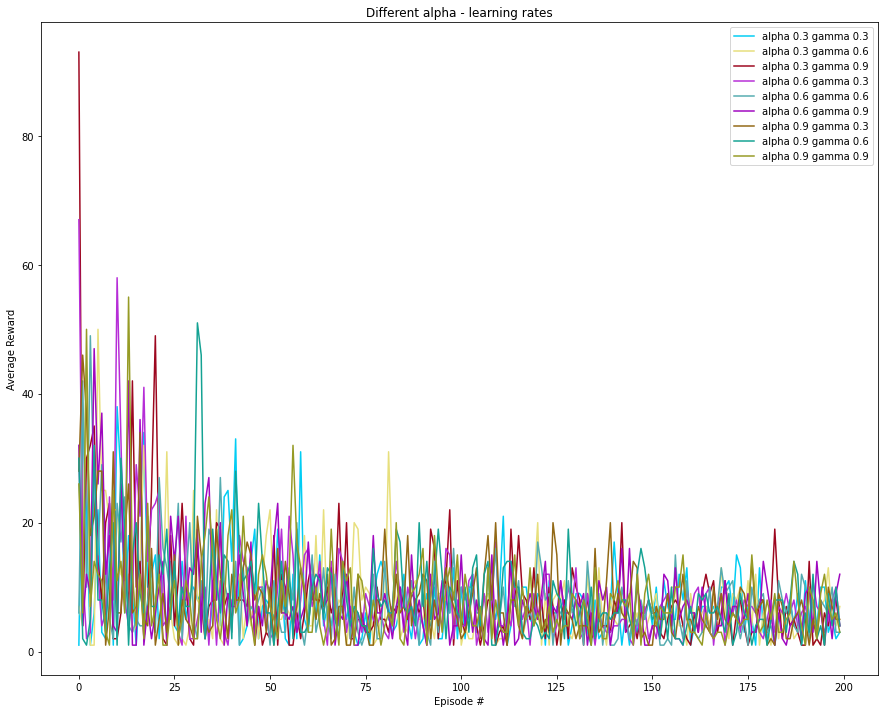

In [ ]:
plt.figure(figsize=(15,12))
for i, j in sgList.items():
  plt.plot(episodeList, sgList[i], color = np.random.rand(3,), label=i)

plt.xlabel('Episode #')
plt.ylabel('Average Reward')
plt.legend(agList)
plt.title('Different alpha - learning rates')

Text(0.5, 1.0, 'Different alpha - learning rates')

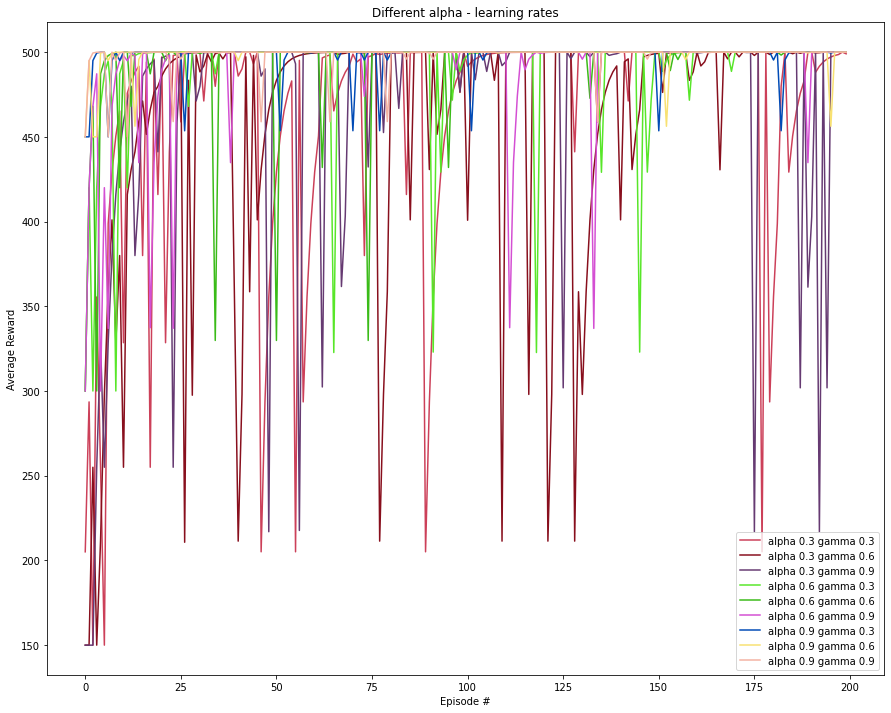

In [ ]:
plt.figure(figsize=(15,12))
for i, j in agList.items():
  plt.plot(episodeList, agList[i], color = np.random.rand(3,), label=i)

plt.xlabel('Episode #')
plt.ylabel('Average Reward')
plt.legend(agList)
plt.title('Different alpha - learning rates')

# Final Result with best parameters of Alpha and Gamma

Alpha = 0.9

gamma = 0.6

epsilon = epsilon greedy policy

In [ ]:
'''
Initializing and setting the environmant.
R is a 6*6 matriz with possible state and actions.
Q is a 4 dimention matrix that updates the future rewards on the 4 possible actions (up, down, left, right)
'''
rows = 6
cols = 6
action = ['up', 'down', 'right', 'left']
R = np.ones((rows,cols)) * -1

walls = [(2,2), (2,3), 
         (3,2)]
traps = [(0,0), (0,2), (1,5), (5,0), (5,3)]
cheese = (4,5)

for i in traps:
    R[i] = -50
for i in walls:
    R[i] = np.nan
R[cheese] = 100

Q = np.zeros((rows,cols,4))



Selected the best parameters after hyperparameter tuning

In [ ]:
'''
Best set of Hyperparameters
'''
epsilon = 0.8  #the percentage of time when we should take the best action (instead of a random action)
gamma = 0.9    #discount_factor     #discount factor for future rewards
alpha  = 0.6   #learning_rate.      #the rate at which the AI agent should learn

In [ ]:
#Random Start location
def get_random_location():
    '''
    To get a random initial position for every episode. 
    Will initate only in a possible state (-1), will not start in a wall state (nan) or trap state (-50)
    Parameters :
      Null
    Returns :
      current row index, current column index, action selected
    '''
    current_row = np.random.randint(rows)
    current_col = np.random.randint(cols)
    action_index = np.random.randint(0,4)
    while R[current_row, current_col] != -1.:
        current_row = np.random.randint(rows)
        current_col = np.random.randint(cols)
        action_index = np.random.randint(0,4)
    return current_row, current_col, action_index 



def next_location(c_row, c_col, action_index):
    ''' 
    Given the current state and next action, returns the next state 
    Parameters : 
      current row index, current column index, next action
    Peturns :
      new row index, new column index
    '''
    new_row = c_row
    new_col = c_col
    if action[action_index] == 'up' :
        new_row -= 1
    elif action[action_index] == 'down':
        new_row += 1
    elif action[action_index] == 'right':
        new_col += 1
    elif action[action_index] == 'left':
        new_col -= 1
    return new_row, new_col



def get_available_actions(c_row,c_col): # 0 6
    ''' 
    Calculates all possible actions from a given state 
    Parameters :
      coloum index , row index
    Results : 
      List of all possible actions
    '''
    current_available_actions = []

    if((c_row-1 >=0) and (~np.isnan(R[c_row-1, c_col] ) )):
        current_available_actions.append(0)
        
    if((c_row+1 < rows) and (~np.isnan(R[c_row+1, c_col]) ) ):
        current_available_actions.append(1)
           
    if((c_col+1 < cols) and (~np.isnan(R[c_row, c_col+1]))):
        current_available_actions.append(2)
        
    if((c_col-1 >=0) and (~np.isnan(R[c_row, c_col-1] ) )):
        current_available_actions.append(3)
    
    actionlist = [action[x] for x in current_available_actions]

    return(current_available_actions)



def immediate_rewards(c_row,c_col, action_index):
    '''
    Calculates immidiate reward with formula q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
    Parameters : 
      c_row - current row index
      c_col - current column index
      action_index - selected action index
    Returns : 
      q value updated using the formula
    '''
    reward = R[c_row,c_col]
    q_old = Q[c_row,c_col,action_index]
    q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))

    return(q_updated)  

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action
    if np.random.random() > epsilon:
      temp = {}
      for i in available_actions:
          temp[i] = Q[c_row, c_col, i]
      next_action = max(temp, key=temp.get)
      
    else: #choose a random action
        next_action= np.random.choice(available_actions)
    return next_action


def update_epsilon(epsilon,decay, min_epsilon):
  '''
  if epsilon is > 0.5, multiplying epsilon with 0.999 else multipling epsilon with 0.995
  Parameters : 
    epsilon
  Returns : 
    updated epsilon
  '''
  epsilon = max(min_epsilon, epsilon*decay)
  return epsilon

In [ ]:
'''
Q-Learning with best set of hyperparameters
'''

def AgentTrainwithThreshold(epsilon = 0.8, gamma = 0.9, alpha  = 0.9, decay = 0.999, min_epsilon = 0.1 ):
  avg_reward_per_episode=[]
  episodeList = []
  stepList=[]

  # Running 200 episodes for the agent to train
  for ep in range(200):
    episodeList.append(ep)
    r = []
    c_row, c_col,action_index = get_random_location()
    Q[c_row, c_col,action_index] = immediate_rewards(c_row, c_col,action_index)
    scores_window = deque(maxlen=50)
    step =0

    #for each episode untill the goal state is reached the iteration runs. 
    #The Q values are updated but the actions are selected at random in every iteratio
    while R[c_row, c_col] != R[cheese]:
      step +=1
      rewardList = []
        
      #to get a list of all available actions from a given state
      available_actions = get_available_actions(c_row, c_col)

      #update epsilon for every iteration as the agents should explore first and exploit in the end
      # epsilon = max(min_epsilon, epsilon*decay)
      epsilon = update_epsilon(epsilon, decay, min_epsilon)

      #next action
      next_action = get_next_action(available_actions, c_row, c_col, epsilon)
      

      old_row = c_row
      old_col = c_col

      c_row , c_col = next_location(c_row, c_col, next_action)

      #getting the reward of the new state
      reward = R[c_row,c_col]
      #updating q table with the new reward     
      q_old = Q[old_row,old_col,next_action]
      q_updated = q_old + (alpha * (reward + gamma * (np.max(Q[c_row, c_col]) )- q_old))
      
      rewardList.append(q_updated)
      scores_window.append(q_updated)
      # print('Immediate reward is {}'.format(q_updated))
      Q[old_row, old_col, next_action] = q_updated

    stepList.append(step)
    avg_reward_per_episode.append(sum(rewardList)/len(rewardList))
    if ep % 50 ==0:
      print('\rEpisode {}\tAverage Score: {:.2f}'.format(ep, np.mean(scores_window)))

  return episodeList ,stepList ,avg_reward_per_episode


episodeList, stepList, avg_reward_per_episode = AgentTrainwithThreshold(epsilon = 0.8)


Episode 0	Average Score: 10.80
Episode 50	Average Score: 68.17
Episode 100	Average Score: 73.53
Episode 150	Average Score: 73.47


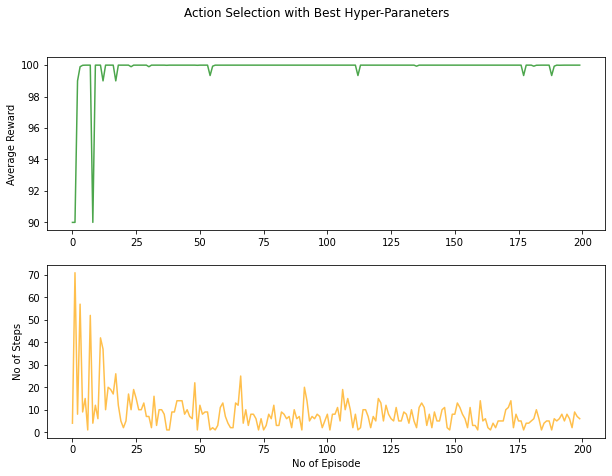

In [ ]:
plt.figure(figsize=(10,7))
plt.suptitle("Action Selection with Best Hyper-Paraneters")
plt.subplot(2, 1, 1)
plt.plot(episodeList, avg_reward_per_episode, color='green', alpha = 0.7)
plt.ylabel('Average Reward')

plt.subplot(2, 1, 2)
plt.plot(episodeList, stepList, color='orange', alpha = 0.7)
plt.xlabel('No of Episode')
plt.ylabel('No of Steps')
plt.show()

# Testing - Shortest Path

## Where is my Cheese? 

Testing the trained agent

In [ ]:
def get_next_action(available_actions, c_row, c_col,epsilon):
    '''
    best action is selected from the list of available actions if factor (generated number is greated than epsilon) 
    else a random action is selected
  
    Parameters : 
      available actions
    Returns : 
      random next action
    '''
    #Choose a best action

    temp = {}
    for i in available_actions:
        temp[i] = Q[c_row, c_col, i]
    next_action = max(temp, key=temp.get)
    return next_action


def get_shortest_path(start_row, start_column):
  shortest_path = []
  shortest_path.append([start_row, start_column])
  if R[start_row, start_column] == R[cheese]:
    return []
  else: 
    current_row, current_column = start_row, start_column
    while R[current_row, current_column] != R[cheese]:
      available_actions = get_available_actions(current_row, current_column)
    
      next_action = get_next_action(available_actions, current_row, current_column, 1.)
      current_row, current_column = next_location(current_row, current_column, next_action)
      shortest_path.append([current_row, current_column])
      
    return shortest_path

In [ ]:
get_shortest_path(3,1)

[[3, 1], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 5]]

In [ ]:
get_shortest_path(1,1)

[[1, 1], [2, 1], [3, 1], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5]]

In [ ]:
get_shortest_path(0,4)

[[0, 4], [1, 4], [2, 4], [2, 5], [3, 5], [4, 5]]

In [ ]:
get_shortest_path(3,1)

[[3, 1], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5]]

R and Q matrix

In [ ]:
R

array([[-50.,  -1., -50.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1., -50.],
       [ -1.,  -1.,  nan,  nan,  -1.,  -1.],
       [ -1.,  -1.,  nan,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1., 100.],
       [-50.,  -1.,  -1., -50.,  -1.,  -1.]])

In [ ]:
Q

array([[[  0.        ,  12.38526972,  22.17411674,   0.        ],
        [ 22.13887531,  42.57499833,   2.22900245,   5.12877177],
        [  0.        ,  -0.99999   ,  43.35152693,  20.25570685],
        [ 39.46581263,  54.86588885,  47.79849068,  36.07431401],
        [ 39.70793465,  62.14110127,  42.23242548,  52.25298571],
        [ 40.08903808,  30.78047735,  40.29370947,  54.89301323]],

       [[  6.42423972,  39.69597035,   7.67124648,  22.26929921],
        [ 37.51270271,  48.45815925,  47.67626199,  -0.999     ],
        [ 33.14690603,  28.81568355,  54.9178216 ,  38.65704699],
        [ 45.78587455,  32.94675825,  61.88273279,  30.58396267],
        [ 54.93903318,  70.04912512,   6.35727113,  54.41030834],
        [ 47.79825706,  -0.99      ,   0.        ,  62.16482861]],

       [[ 40.53482775,  48.17227552,  43.45770722,  37.34846313],
        [ 42.95248265,  54.9539    ,  40.69591736,  42.0980405 ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
      